In [72]:
import pandas as pd
Big_Five_Original = pd.read_csv('../data/data-final.csv', delimiter='\t')

In [73]:
Big_Five_Original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [74]:
# Selecting only the information we need
Big_Five = Big_Five_Original.iloc[:,0:101]
Big_Five['country'] = Big_Five_Original.iloc[:,107]
Big_Five.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,KE


In [75]:
# Data Cleaning
Big_Five.isna().sum()

EXT1        1783
EXT2        1783
EXT3        1783
EXT4        1783
EXT5        1783
            ... 
OPN8_E      1783
OPN9_E      1783
OPN10_E     1783
dateload       0
country       77
Length: 102, dtype: int64

In [76]:
# Removing null values
Big_Five = Big_Five.dropna(how='any')

In [77]:
n_samples, n_features = Big_Five.shape
print(n_samples)
print(n_features)

1013481
102


In [78]:
# Removing zero values (not valid)
Big_Five = Big_Five[(Big_Five.T != 0).all()]

In [79]:
n_samples, n_features = Big_Five.shape
print(n_samples)
print(n_features)

868933
102


<AxesSubplot:>

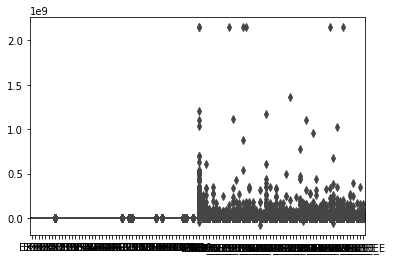

In [80]:
import seaborn as sns
sns.boxplot(data=Big_Five)

In [81]:
# Numerosity Reduction
Big_Five = Big_Five.sample(50000)

In [82]:
df_model=Big_Five.iloc[:,:50]
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
370320,1.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,5.0,...,3.0,2.0,4.0,1.0,3.0,2.0,3.0,3.0,5.0,4.0
319353,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,...,2.0,1.0,5.0,3.0,3.0,1.0,3.0,1.0,4.0,4.0
65779,3.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,5.0,...,2.0,3.0,4.0,2.0,3.0,1.0,5.0,2.0,5.0,4.0
55385,2.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,1.0,4.0,...,3.0,4.0,3.0,2.0,4.0,1.0,4.0,3.0,5.0,5.0
563841,4.0,1.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,4.0,...,5.0,1.0,3.0,1.0,5.0,3.0,5.0,2.0,3.0,5.0


In [83]:
TimeSpent = Big_Five.iloc[:,50:100]
TimeSpent.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
370320,2292.0,2971.0,5256.0,3385.0,11827.0,2486.0,3470.0,4171.0,2237.0,5421.0,...,2520.0,10628.0,3136.0,5757.0,2070.0,3854.0,3388.0,5088.0,4955.0,6841.0
319353,11963.0,4106.0,2738.0,3382.0,2952.0,28051.0,3468.0,3619.0,7027.0,3751.0,...,3615.0,10440.0,2802.0,14055.0,7813.0,4363.0,7783.0,3191.0,3976.0,23981.0
65779,7423.0,2627.0,2626.0,5762.0,1983.0,3440.0,3153.0,2675.0,8680.0,2945.0,...,8653.0,3002.0,12235.0,26078.0,1673.0,3850.0,4193.0,2546.0,1414.0,2250.0
55385,8909.0,3779.0,5719.0,2827.0,2975.0,2866.0,5279.0,4796.0,3760.0,9264.0,...,3621.0,5084.0,5427.0,7926.0,2633.0,3485.0,3559.0,3771.0,3917.0,2007.0
563841,6785.0,1539.0,2097.0,2507.0,1663.0,1253.0,4238.0,3080.0,1747.0,2214.0,...,1591.0,3371.0,1297.0,1181.0,1197.0,1141.0,1262.0,2394.0,2145.0,876.0


In [84]:
indexes = range(1,50)
for index in indexes:
    if index % 2 == 1:
        df_model.iloc[:,index].replace({1: 5, 2: 4, 4: 2, 5:1}, inplace=True)
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
370320,1.0,4.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,...,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0,5.0,2.0
319353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,2.0,5.0,5.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0
65779,3.0,3.0,5.0,5.0,2.0,2.0,2.0,4.0,5.0,1.0,...,2.0,3.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,2.0
55385,2.0,2.0,4.0,2.0,4.0,1.0,3.0,1.0,1.0,2.0,...,3.0,2.0,3.0,4.0,4.0,5.0,4.0,3.0,5.0,1.0
563841,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,...,5.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,3.0,1.0


In [85]:
data = pd.concat([df_model, TimeSpent, Big_Five.iloc[:,100:]], axis=1, join="inner")
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,country
370320,1.0,4.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,...,3136.0,5757.0,2070.0,3854.0,3388.0,5088.0,4955.0,6841.0,2017-03-09 09:55:17,GB
319353,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,2802.0,14055.0,7813.0,4363.0,7783.0,3191.0,3976.0,23981.0,2017-01-19 13:49:30,US
65779,3.0,3.0,5.0,5.0,2.0,2.0,2.0,4.0,5.0,1.0,...,12235.0,26078.0,1673.0,3850.0,4193.0,2546.0,1414.0,2250.0,2016-04-21 08:51:34,PL
55385,2.0,2.0,4.0,2.0,4.0,1.0,3.0,1.0,1.0,2.0,...,5427.0,7926.0,2633.0,3485.0,3559.0,3771.0,3917.0,2007.0,2016-04-13 05:40:31,US
563841,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,...,1297.0,1181.0,1197.0,1141.0,1262.0,2394.0,2145.0,876.0,2017-12-30 14:54:12,US


In [86]:
data.to_csv("../data/data.csv", index_label="id")

In [87]:
# Dimensionality Reduction with Variance Threshold

from sklearn.feature_selection import VarianceThreshold
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]
col_list = list(TimeSpent)
ts_ext = col_list[0:10]
ts_est = col_list[10:20]
ts_agr = col_list[20:30]
ts_csn = col_list[30:40]
ts_opn = col_list[40:50]

def selectByVarianceThreshold(k, model, col):
    for i in range(10,300,1):
        feat_selector = VarianceThreshold(threshold=i/100)
        selected = feat_selector.fit(model[col])
        mask = selected.variances_ > i/100
        if(mask.sum() == k):
            return mask

In [88]:
# Selected features for EXT
mask = selectByVarianceThreshold(5, df_model, ext)
ext_df = df_model[ext]
ext_ts = TimeSpent[ts_ext]
ext_df_selected = ext_df.loc[:,mask]
ext_ts_selected = ext_ts.loc[:,mask]
list(ext_df_selected.columns)

['EXT1', 'EXT2', 'EXT7', 'EXT9', 'EXT10']

In [89]:
# Selected features for EST
mask = selectByVarianceThreshold(5, df_model, est)
est_df = df_model[est]
est_ts = TimeSpent[ts_est]
est_df_selected = est_df.loc[:,mask]
est_ts_selected = est_ts.loc[:,mask]
list(est_df_selected.columns)

['EST1', 'EST6', 'EST8', 'EST9', 'EST10']

In [90]:
# Selected features for AGR
mask = selectByVarianceThreshold(5, df_model, agr)
agr_df = df_model[agr]
agr_ts = TimeSpent[ts_agr]
agr_df_selected = agr_df.loc[:,mask]
agr_ts_selected = agr_ts.loc[:,mask]
list(agr_df_selected.columns)

['AGR1', 'AGR3', 'AGR5', 'AGR6', 'AGR9']

In [91]:
# Selected features for CSN
mask = selectByVarianceThreshold(5, df_model, csn)
csn_df = df_model[csn]
csn_ts = TimeSpent[ts_csn]
csn_df_selected = csn_df.loc[:,mask]
csn_ts_selected = csn_ts.loc[:,mask]
list(csn_df_selected.columns)

['CSN2', 'CSN4', 'CSN5', 'CSN6', 'CSN9']

In [92]:
# Selected features for OPN
mask = selectByVarianceThreshold(5, df_model, opn)
opn_df = df_model[opn]
opn_ts = TimeSpent[ts_opn]
opn_df_selected = opn_df.loc[:,mask]
opn_ts_selected = opn_ts.loc[:,mask]
list(opn_df_selected.columns)

['OPN1', 'OPN2', 'OPN4', 'OPN6', 'OPN8']

In [93]:
df_concatenated = pd.concat([ext_df_selected, est_df_selected, agr_df_selected, csn_df_selected, opn_df_selected],
                         axis=1, join="inner")
df_concatenated.head()

,EXT1,EXT2,EXT7,EXT9,EXT10,EST1,EST6,EST8,EST9,EST10,...,CSN2,CSN4,CSN5,CSN6,CSN9,OPN1,OPN2,OPN4,OPN6,OPN8
370320,1.0,4.0,1.0,2.0,1.0,5.0,2.0,2.0,3.0,3.0,...,1.0,1.0,2.0,1.0,1.0,3.0,4.0,5.0,4.0,3.0
319353,1.0,1.0,1.0,3.0,1.0,4.0,3.0,4.0,3.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,5.0,3.0,5.0,5.0
65779,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,4.0,3.0,...,5.0,4.0,3.0,5.0,5.0,2.0,3.0,4.0,5.0,4.0
55385,2.0,2.0,3.0,1.0,2.0,3.0,2.0,4.0,3.0,2.0,...,3.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,5.0,3.0
563841,4.0,5.0,4.0,5.0,2.0,3.0,4.0,3.0,1.0,3.0,...,4.0,3.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,4.0


In [94]:
# Selecting the time associated with the selected features

ts_concatenated = pd.concat([ext_ts_selected, est_ts_selected, agr_ts_selected, csn_ts_selected, opn_ts_selected],
                         axis=1, join="inner")
ts_concatenated.head()

,EXT1_E,EXT2_E,EXT7_E,EXT9_E,EXT10_E,EST1_E,EST6_E,EST8_E,EST9_E,EST10_E,...,CSN2_E,CSN4_E,CSN5_E,CSN6_E,CSN9_E,OPN1_E,OPN2_E,OPN4_E,OPN6_E,OPN8_E
370320,2292.0,2971.0,3470.0,2237.0,5421.0,3219.0,2386.0,2687.0,5155.0,3420.0,...,4971.0,2587.0,4538.0,3120.0,2020.0,2520.0,10628.0,5757.0,3854.0,5088.0
319353,11963.0,4106.0,3468.0,7027.0,3751.0,2441.0,3039.0,3108.0,3924.0,1286.0,...,4361.0,3344.0,8505.0,50821.0,3156.0,3615.0,10440.0,14055.0,4363.0,3191.0
65779,7423.0,2627.0,3153.0,8680.0,2945.0,3562.0,2925.0,4314.0,2033.0,618.0,...,3263.0,2814.0,2332.0,5960.0,1543.0,8653.0,3002.0,26078.0,3850.0,2546.0
55385,8909.0,3779.0,5279.0,3760.0,9264.0,4051.0,2548.0,3666.0,4201.0,4201.0,...,5134.0,4407.0,5785.0,5268.0,3614.0,3621.0,5084.0,7926.0,3485.0,3771.0
563841,6785.0,1539.0,4238.0,1747.0,2214.0,1237.0,2310.0,1358.0,2887.0,1902.0,...,1301.0,3354.0,2274.0,2241.0,1972.0,1591.0,3371.0,1181.0,1141.0,2394.0


In [95]:
data_sample = pd.concat([df_concatenated, ts_concatenated, Big_Five.iloc[:,100:]], axis=1, join="inner")

In [96]:
data_sample.to_csv("../data/data-selected-attributes.csv", index_label="id")

In [4]:
import pandas as pd

data_sample = pd.read_csv("../data/data-selected-attributes.csv", index_col=0)

In [5]:
df_model=data_sample.iloc[:,0:25]
df_model.head()

,EXT1,EXT2,EXT7,EXT9,EXT10,EST1,EST6,EST8,EST9,EST10,...,CSN2,CSN4,CSN5,CSN6,CSN9,OPN1,OPN2,OPN4,OPN6,OPN8
id,,,,,,,,,,,,,,,,,,,,,
370320,1.0,4.0,1.0,2.0,1.0,5.0,2.0,2.0,3.0,3.0,...,1.0,1.0,2.0,1.0,1.0,3.0,4.0,5.0,4.0,3.0
319353,1.0,1.0,1.0,3.0,1.0,4.0,3.0,4.0,3.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,5.0,3.0,5.0,5.0
65779,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,4.0,3.0,...,5.0,4.0,3.0,5.0,5.0,2.0,3.0,4.0,5.0,4.0
55385,2.0,2.0,3.0,1.0,2.0,3.0,2.0,4.0,3.0,2.0,...,3.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,5.0,3.0
563841,4.0,5.0,4.0,5.0,2.0,3.0,4.0,3.0,1.0,3.0,...,4.0,3.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,4.0


In [6]:
# Feature Generation

TimeSpent = data_sample.iloc[:,25:50]
TimeSpent = round(TimeSpent.sum(axis = 1) / 1000 / 60,2)
df_model = pd.concat([df_model, TimeSpent], axis=1, join="inner")
df_model.rename(columns={0: 'TimeSpent'}, inplace=True)
df_model.head()
col_list = list(df_model)
time = col_list[25]

In [7]:
ext = col_list[0:5]
est = col_list[5:10]
agr = col_list[10:15]
csn = col_list[15:20]
opn = col_list[20:25]
data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/5
data_sums['neurotic'] = df_model[est].sum(axis=1)/5
data_sums['agreeable'] = df_model[agr].sum(axis=1)/5
data_sums['conscientious'] = df_model[csn].sum(axis=1)/5
data_sums['open'] = df_model[opn].sum(axis=1)/5
data_time = df_model[time]
df_model = pd.concat([data_sums,data_time], axis=1, join='inner')
df_model.head()

,extroversion,neurotic,agreeable,conscientious,open,TimeSpent
id,,,,,,
370320,1.8,3.0,3.0,1.2,3.8,1.69
319353,1.4,3.2,3.0,1.2,4.0,2.81
65779,2.8,2.4,2.6,4.4,3.6,2.02
55385,2.0,2.8,3.4,3.4,3.4,2.70
563841,4.0,2.8,2.4,3.0,4.4,0.95


In [8]:
n_samples, n_features = df_model.shape
print(n_samples)
print(n_features)

50000
6


In [10]:
# Outlier Detection (on TimeSpent)
Q1 = df_model.iloc[:,5].quantile(0.25)
Q3 = df_model.iloc[:,5].quantile(0.75)
IQR = Q3 - Q1
df_model_out = df_model[~((df_model.iloc[:,5] < (Q1 - 2.2 * IQR)) |(df_model.iloc[:,5] > (Q3 + 2.2 * IQR)))]
[Q3 + 2.2 * IQR, Q1 - 2.2 * IQR]

[5.046000000000001, -1.0560000000000007]

<AxesSubplot:>

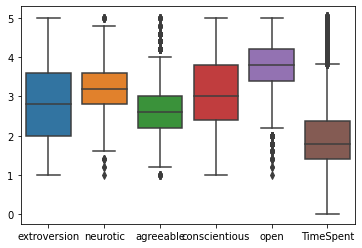

In [102]:
sns.boxplot(data=df_model_out)

In [106]:
df_model_out.to_csv('../data/data-preprocessed.csv', index_label="id")